# Import Libraries


In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Instacart Basket Analysis'

#### Import the file ords_prods_grouped_agg.pkl into the data frame

In [4]:
# use read_pickle() function to import the file
ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_grouped_agg.pkl'))

### Bar Charts

<Axes: xlabel='order_days_of_week'>

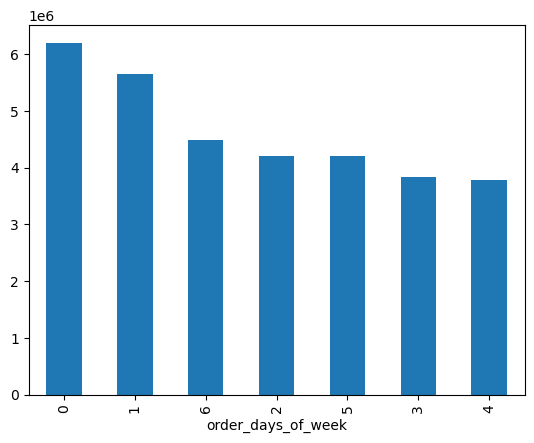

In [5]:
# create a Bar Chart
ords_prods_merge['order_days_of_week'].value_counts().plot.bar()

#### Sorting the index of the Bar chart

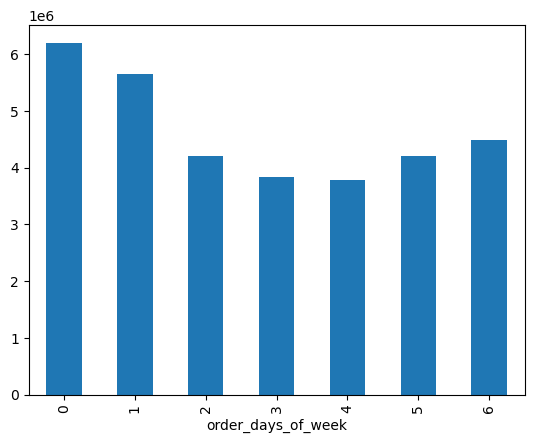

In [6]:
bar = ords_prods_merge['order_days_of_week'].value_counts().sort_index().plot.bar()

### Applying color to the Bar chart

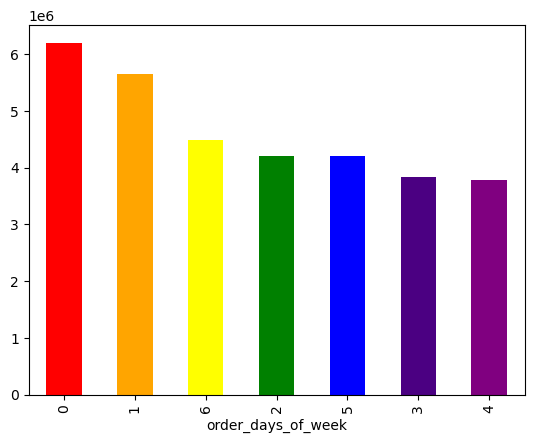

In [7]:
bar = ords_prods_merge['order_days_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'])

# Exporting Charts

In [8]:
# Exporting the chart as png image file
bar.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'bar_order_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

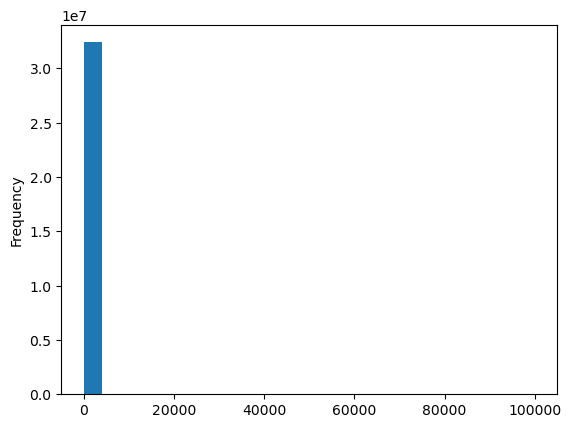

In [9]:
# create a histogram for the column prices
ords_prods_merge['prices'].plot.hist(bins = 25)

In [10]:
# checking exploratory statistics of the column 'prices'
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

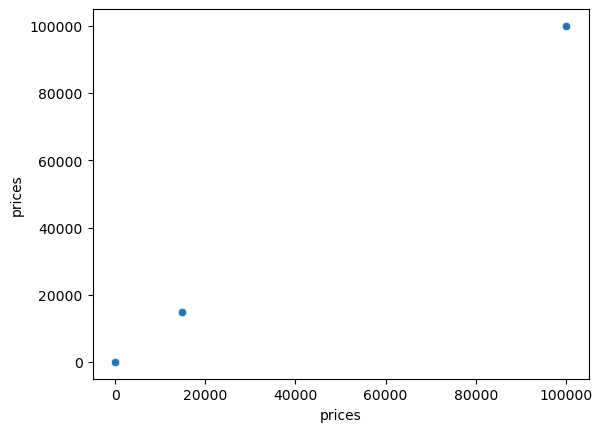

In [11]:
# create a Scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [12]:
# find out how many products are there above the price range 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,day_prior_order_median,order_frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly Busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly Busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly Busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest Days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest Days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest Days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly Busy,Most orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Least Busy Days,Fewest orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32380527,1916142,206049,1,2,17,7.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly Busy,Average orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [13]:
# mark all the prices above 100 as missing since they don’t make sense in terms of the other values in the column
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [14]:
ords_prods_merge['prices'].max()

25.0

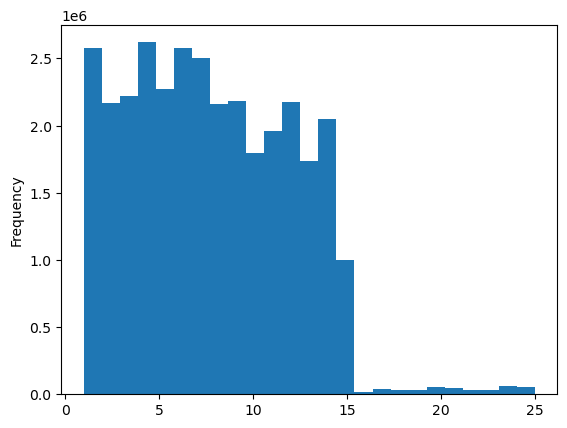

In [15]:
# After cleaning the data. create the histogram again
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

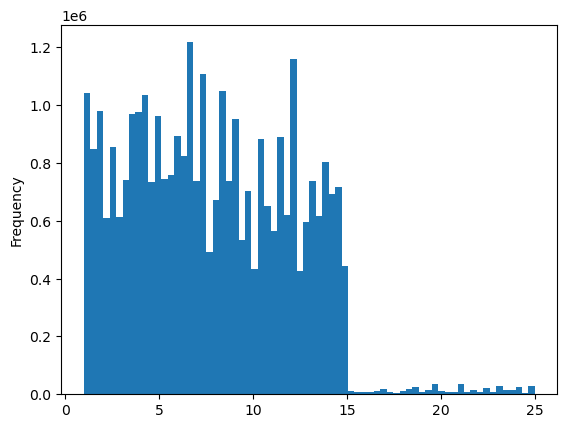

In [16]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
# Exporting the histogram as png image file
hist2.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'histogram_prices.png'))

# Sampling Data

In [18]:
# set a random reproducible pattern
np.random.seed(4)
# create a list which holds an array of True or False for every value based on whether it’s less than or equal to 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
# output of dev
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
# store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [21]:
# store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [22]:
# output the length of the dataframe
len(ords_prods_merge)

32404859

In [23]:
# checking the combined length of big and small is same as the original dataframe
len(big) + len(small)

32404859

In [24]:
# create a new dataframe which holds only the necessary columns from the ords_prods_merge for faster processing
df_2 = small[['order_days_of_week', 'prices']]

C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


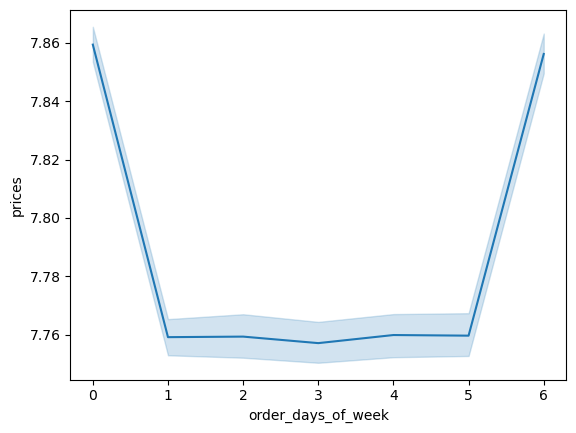

In [25]:
# create a line chart
line = sns.lineplot(data = df_2, x = 'order_days_of_week', y = 'prices')

In [26]:
# Applying the same method on the original dataset to create the line chart
df_4 = ords_prods_merge[['order_days_of_week', 'prices']]

C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sreelakshmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


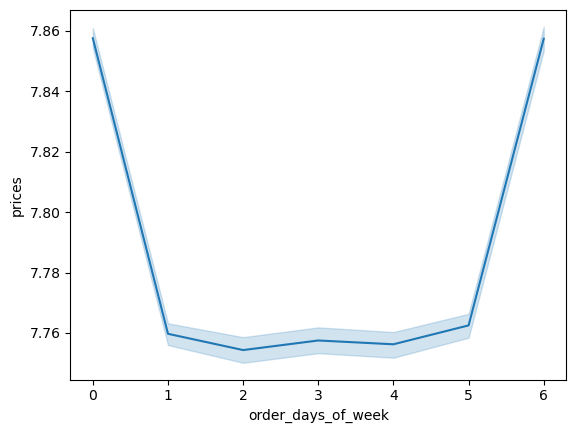

In [27]:
# create a line chart
line_2 = sns.lineplot(data = df_4, x = 'order_days_of_week', y = 'prices')

In [28]:
# Exporting the line chart as png image file
line_2.figure.savefig(os.path.join(path,'Analysis', 'Visualizations', 'Line_chart_order_dow_prices.png'))